In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Large Random Samples

In [3]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united_bins = np.arange(-20, 201, 5)

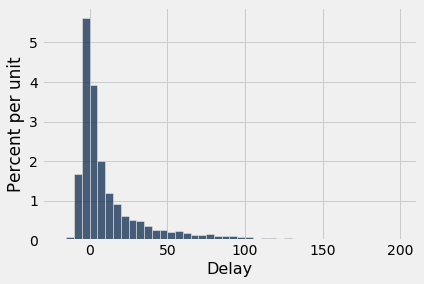

In [4]:
# (Population) Probability Distribution
united.hist('Delay', bins = united_bins)

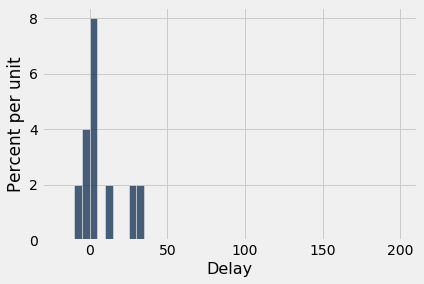

In [5]:
# (Sample) Empirical Distribution
united.sample(10).hist('Delay', bins = united_bins)

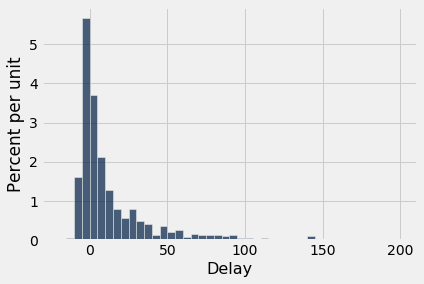

In [6]:
# (Sample) Empirical Distribution
united.sample(1000).hist('Delay', bins = united_bins)

## Statistics

In [7]:
# (Population) Parameter
np.median(united.column('Delay'))

2.0

In [8]:
# (Sample) Statistic
np.median(united.sample(10).column('Delay'))

12.0

In [9]:
# (Sample) Statistic
np.median(united.sample(100).column('Delay'))

3.0

### Probability & Empirical Distributions of a Statistic

In [10]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [11]:
sample_median(10)

3.5

In [12]:
num_simulations = 2000

In [13]:
sample_medians = make_array()

for i in np.arange(num_simulations):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

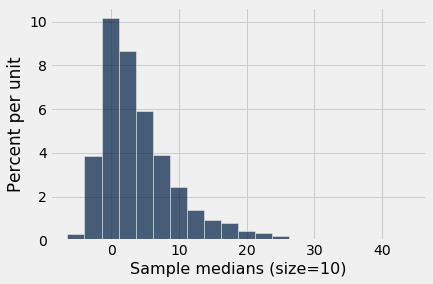

In [14]:
Table().with_column('Sample medians (size=10)', sample_medians).hist(bins=20)

In [15]:
sample_medians = make_array()

for i in np.arange(num_simulations):
    new_median = sample_median(1000)
    sample_medians = np.append(sample_medians, new_median)

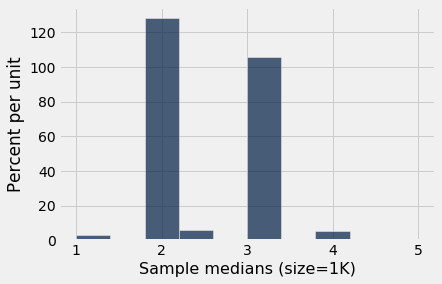

In [16]:
Table().with_column('Sample medians (size=1K)', sample_medians).hist()

#### Empirical Distributions Overlayed

In [17]:
sample_medians_10 = make_array()
sample_medians_100 = make_array()
sample_medians_1000 = make_array()

num_simulations = 2000

for i in np.arange(num_simulations):
    new_median_10 = sample_median(10)
    sample_medians_10 = np.append(sample_medians_10, new_median_10)
    new_median_100 = sample_median(100)
    sample_medians_100 = np.append(sample_medians_100, new_median_100)
    new_median_1000 = sample_median(1000)
    sample_medians_1000 = np.append(sample_medians_1000, new_median_1000)

In [18]:
sample_medians = Table().with_columns('Size 10', sample_medians_10, 
                                      'Size 100', sample_medians_100,
                                      'Size 1000', sample_medians_1000)

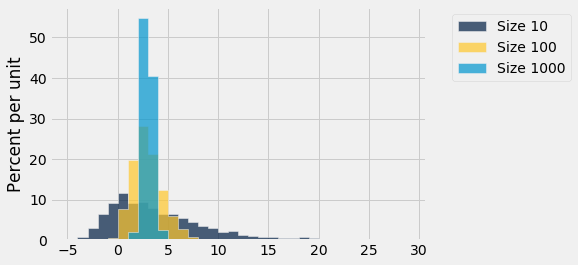

In [19]:
sample_medians.hist(bins = np.arange(-5, 30))

## Swain vs. Alabama ##

In [20]:
population_proportions = make_array(.26, .74)
population_proportions

array([0.26, 0.74])

In [21]:
sample_proportions(100, population_proportions)

array([0.26, 0.74])

In [22]:
def panel_proportion():
    return sample_proportions(100, population_proportions).item(0)

In [23]:
panel_proportion()

0.28

In [24]:
panels = make_array()

for i in np.arange(10000):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)

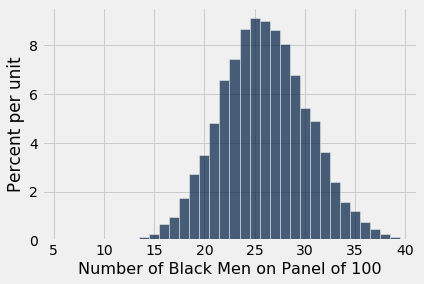

In [25]:
Table().with_column('Number of Black Men on Panel of 100', panels).hist(bins=np.arange(5.5,40.))

## Mendel and Pea Flowers ##

In [26]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709 / 929
observed_purples

0.7631862217438106

In [27]:
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)

array([0.75672766, 0.24327234])

In [28]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [29]:
purple_flowers()

74.59634015069967

In [30]:
purples = make_array()

for i in np.arange(10000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)

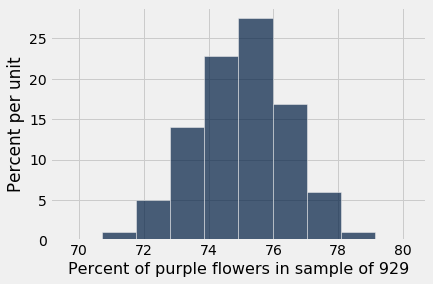

In [31]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

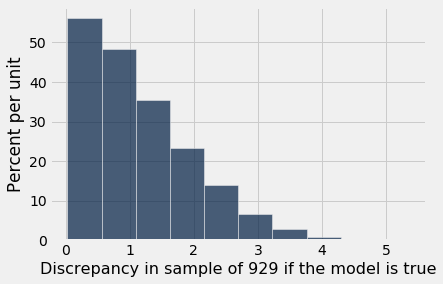

In [32]:
Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples- 75)).hist()

In [33]:
abs(observed_purples * 100 - 75)

1.318622174381062